In [60]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [61]:
# laoad the dataset
data=pd.read_csv("C:/Users/uig76897/Data science Projects/Data-Science-Projects-Boufaied/forecasting/store-sales-time-series-forecasting/train.csv")
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [63]:
#checikng for missing values
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [64]:
data.duplicated().sum()

np.int64(0)

In [65]:
data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [66]:
# Unique values in the columns
data.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [67]:
# Unique values in the 'family' column
data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [68]:
#unique values in the 'store_nbr' column
data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

## Data Preprocessing

In [69]:
#converting 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [70]:
# Filtering the data for the first store and family
data_store_family = data[(data['store_nbr'] == 9) & (data['family'] == 'AUTOMOTIVE')].copy()
data_store_family.head()

,id,date,store_nbr,family,sales,onpromotion
1749,1749,2013-01-01,9,AUTOMOTIVE,0.0,0
3531,3531,2013-01-02,9,AUTOMOTIVE,5.0,0
5313,5313,2013-01-03,9,AUTOMOTIVE,22.0,0
7095,7095,2013-01-04,9,AUTOMOTIVE,0.0,0
8877,8877,2013-01-05,9,AUTOMOTIVE,27.0,0


In [71]:
# checking if the date is contiguous
date_range = pd.date_range(start=data_store_family['date'].min(), end=data_store_family['date'].max())
#checking for missing dates
missing_dates = date_range.difference(data_store_family['date'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

the only missing dates areare Christmas dates. 
That’s actually expected because most stores are closed on Christmas so no sales are recorded.

In [72]:
# filling missing values with zero
data_store_family = data_store_family.set_index('date').asfreq('D').fillna(0).reset_index()
missing_dates_filled = date_range.difference(data_store_family['date'])
missing_dates_filled

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

## Exploratory Data Analysis (EDA)

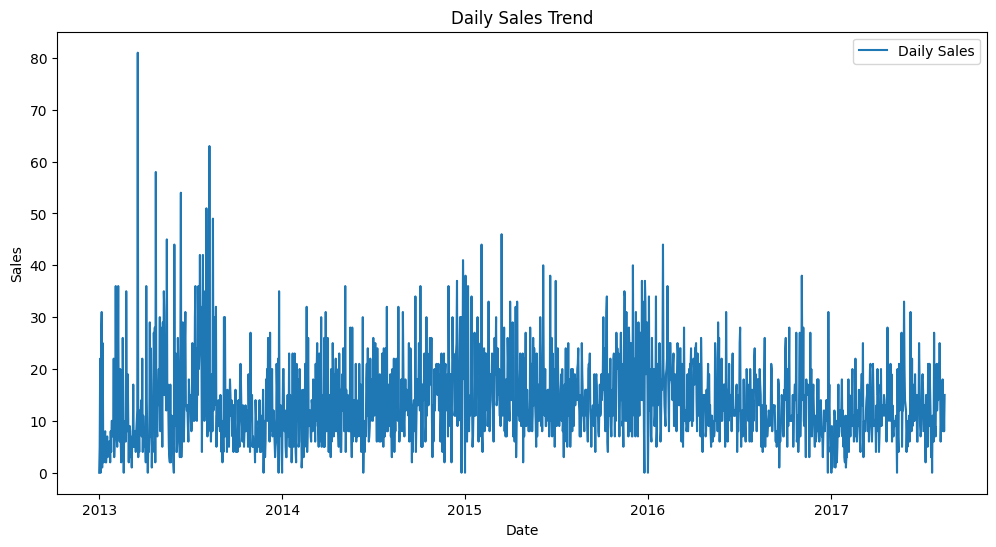

In [73]:
# Plotting daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(data_store_family['date'], data_store_family['sales'], label='Daily Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

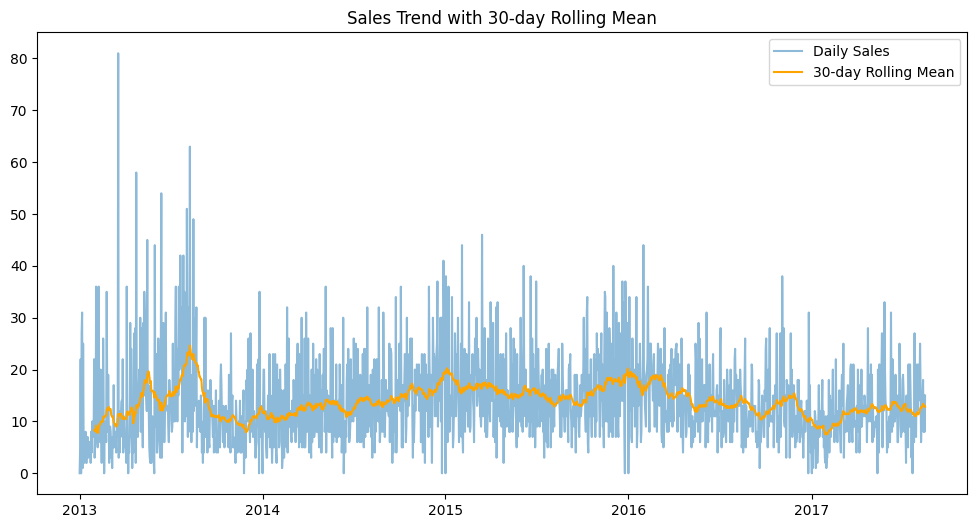

In [74]:
# Visualizing long term sales patterns
#   Rolling mean
data_store_family['rolling_mean_30'] = data_store_family['sales'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_store_family['date'], data_store_family['sales'], label='Daily Sales', alpha=0.5)
plt.plot(data_store_family['date'], data_store_family['rolling_mean_30'], color='orange', label='30-day Rolling Mean')
plt.legend()
plt.title('Sales Trend with 30-day Rolling Mean')
plt.show()

<Axes: title={'center': 'Average Sales by Day of Week'}, xlabel='day_of_week'>

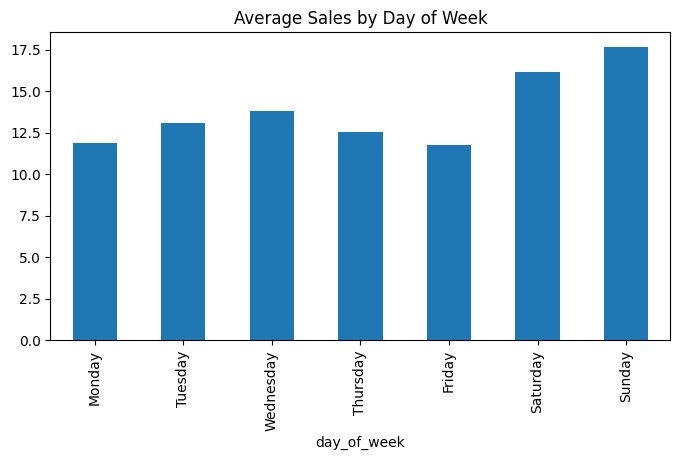

In [75]:
# Checking the average sales by day of the week
data_store_family['day_of_week'] = data_store_family['date'].dt.day_name()
weekday_sales = data_store_family.groupby('day_of_week')['sales'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

weekday_sales.plot(kind='bar', figsize=(8,4), title='Average Sales by Day of Week')


In [76]:
data_store_family.head()

,date,id,store_nbr,family,sales,onpromotion,rolling_mean_30,day_of_week
0,2013-01-01,1749.0,9.0,AUTOMOTIVE,0.0,0.0,NaN,Tuesday
1,2013-01-02,3531.0,9.0,AUTOMOTIVE,5.0,0.0,NaN,Wednesday
2,2013-01-03,5313.0,9.0,AUTOMOTIVE,22.0,0.0,NaN,Thursday
3,2013-01-04,7095.0,9.0,AUTOMOTIVE,0.0,0.0,NaN,Friday
4,2013-01-05,8877.0,9.0,AUTOMOTIVE,27.0,0.0,NaN,Saturday


Most days have sales between roughly 10 and 20.
but there are several days with unusual high sales.


<Axes: xlabel='sales'>

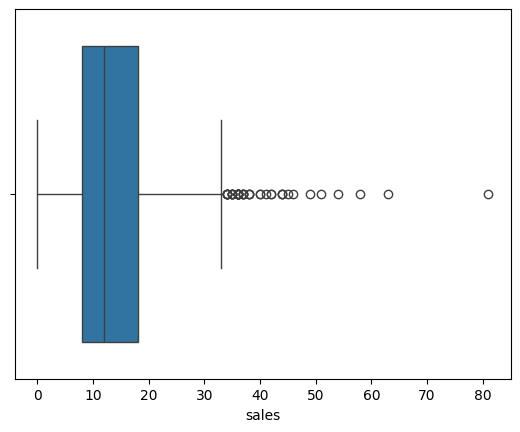

In [77]:
sns.boxplot(x=data_store_family['sales'])

<Axes: xlabel='date', ylabel='date'>

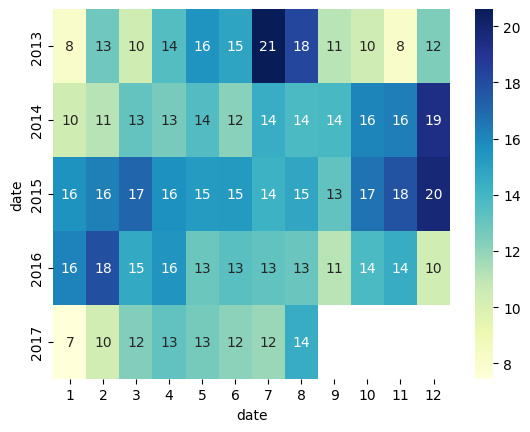

In [78]:
#Visualizing the heatmap for year vs month sales
pivot = data_store_family.pivot_table(index=data_store_family['date'].dt.year,
                             columns=data_store_family['date'].dt.month,
                             values='sales', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')

# Forecasting with Prophet


In [93]:
data_store_family_prophet = data_store_family[['date','sales']].rename(columns={'date':'ds','sales':'y'})
data_store_family_prophet.head()

,ds,y
0,2013-01-01,0.0
1,2013-01-02,5.0
2,2013-01-03,22.0
3,2013-01-04,0.0
4,2013-01-05,27.0


In [94]:
#train test split
train_data = data_store_family_prophet[:-90]
test_data = data_store_family_prophet[-90:]

In [95]:
# Fitting the Prophet model
model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model.fit(train_data)

13:18:49 - cmdstanpy - INFO - Chain [1] start processing
13:18:50 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
# creating future dates 
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1683,2017-08-11,9.285754,-1.809214,18.588010,9.232200,9.345020,-0.695491,-0.695491,-0.695491,-2.140412,-2.140412,-2.140412,1.444921,1.444921,1.444921,0.0,0.0,0.0,8.590263
1684,2017-08-12,9.274338,2.955331,23.053281,9.219649,9.335771,3.712085,3.712085,3.712085,2.405135,2.405135,2.405135,1.306950,1.306950,1.306950,0.0,0.0,0.0,12.986424
1685,2017-08-13,9.262923,4.374799,23.603763,9.207331,9.325466,4.957337,4.957337,4.957337,3.792535,3.792535,3.792535,1.164802,1.164802,1.164802,0.0,0.0,0.0,14.220260
1686,2017-08-14,9.251508,-1.748393,18.015626,9.195621,9.315107,-0.941384,-0.941384,-0.941384,-1.960873,-1.960873,-1.960873,1.019489,1.019489,1.019489,0.0,0.0,0.0,8.310124
1687,2017-08-15,9.240092,-0.871830,18.835984,9.182927,9.306060,0.044967,0.044967,0.044967,-0.826979,-0.826979,-0.826979,0.871946,0.871946,0.871946,0.0,0.0,0.0,9.285059


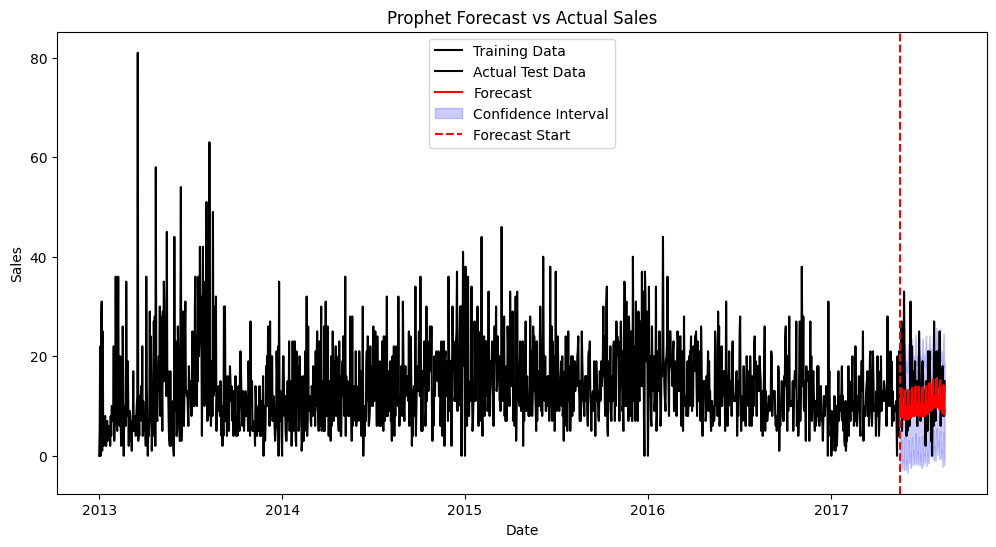

In [ ]:
#ploting the forcast vs actual sales
forecast_future = forecast[forecast['ds'] > train_data['ds'].max()]

forecast_plot = forecast[['ds','yhat','yhat_lower','yhat_upper']]
df_plot = test_data.merge(forecast_plot, on='ds', how='left')

plt.figure(figsize=(12,6))

# Ploting training data
plt.plot(train_data['ds'], train_data['y'], label='Training Data', color='black')

# Ploting actual test data
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='black')

# Ploting forecast
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast', color='red')

# Confidence interval
plt.fill_between(df_plot['ds'], df_plot['yhat_lower'], df_plot['yhat_upper'],
                 color='blue', alpha=0.2, label='Confidence Interval')

plt.axvline(x=train_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast vs Actual Sales')
plt.legend()
plt.show()

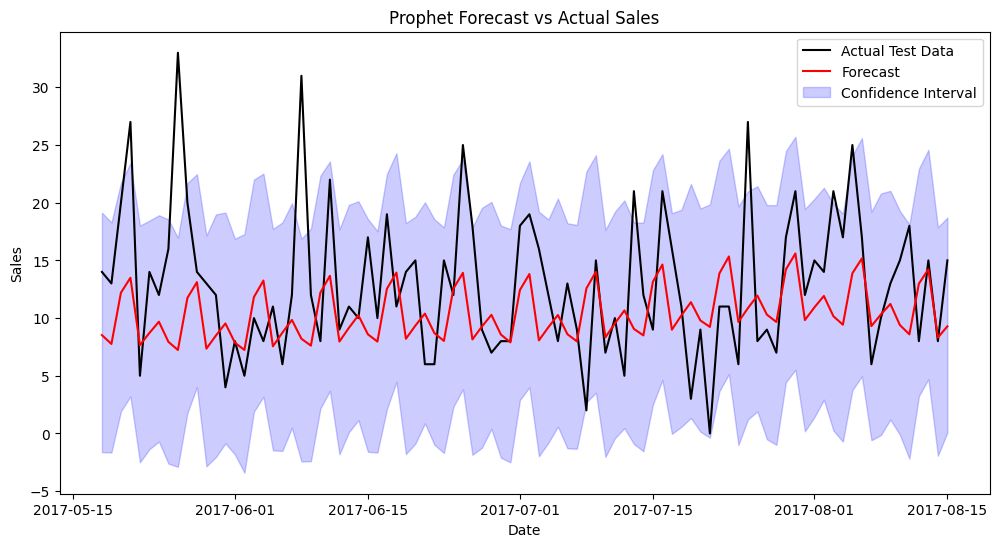

In [ ]:
#closer look 
plt.figure(figsize=(12,6))
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='black')
# Ploting forecast
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast', color='red')
# Confidence interval
plt.fill_between(df_plot['ds'], df_plot['yhat_lower'], df_plot['yhat_upper'],
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast vs Actual Sales')
plt.legend()
plt.show()

## Evaluating the model
using the mean absolute error (MAE) and root mean squared error (RMSE) as evaluation metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

forecast_test = forecast[forecast['ds'].isin(test_data['ds'])]

comparison = test_data.merge(forecast_test[['ds','yhat']], on='ds', how='left')

mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat']))
mae, rmse

(4.965898178105094, np.float64(6.6688190420272555))

# SARIMA model

In [114]:

# importing the needed libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

##  ADF test to check stationarity

In [120]:
result = adfuller(data_store_family_prophet['y'])
print('ADF', result[0], 'P value',result[1])

ADF -4.941015718607738 P value 2.8999627956320465e-05


No differencing is needed as the P-value is less than 0.05. 
d=0 

In [126]:
seasonal_diff = data_store_family_prophet['y'].diff(7).dropna()
adf_result_seasonal = adfuller(seasonal_diff)
print('ADF Statistic (seasonal diff):', adf_result_seasonal[0])
print('p-value (seasonal diff):', adf_result_seasonal[1])

ADF Statistic (seasonal diff): -13.373930595436065
p-value (seasonal diff): 5.132711136731224e-25


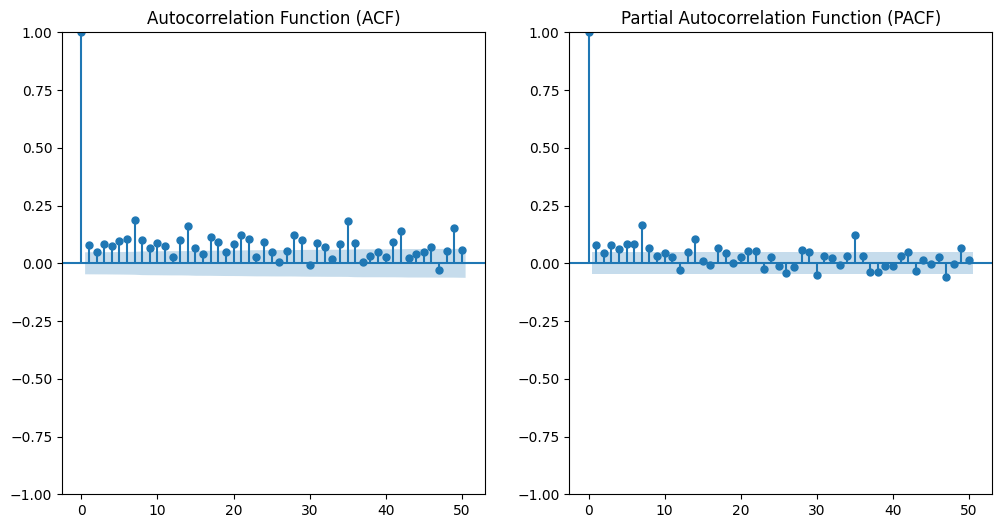

In [129]:
# ACF and PACF plots
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data_store_family_prophet['y'], lags=50,ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.subplot(122)
plot_pacf(data_store_family_prophet['y'], lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [130]:
sarima_model = SARIMAX(data_store_family_prophet['y'], order=(1,0,1), seasonal_order=(1,0,1,7),enforce_stationarity=False
                       ,enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)
# summary of fit model
sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1688
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -5821.845
Date:                           Sun, 27 Jul 2025   AIC                          11653.691
Time:                                   14:28:49   BIC                          11680.821
Sample:                                        0   HQIC                         11663.741
                                          - 1688                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9846      0.006    153.845      0.000       0.972       0.997
ma.L1         -0.9457      0.013    -74.986      0.000      -0.970      -0.921
ar.S.L7        0.9983      0.002    524.198      0.000       0.995       1.002
ma.S.L7       -0.9706      0.009   -111.173      0.000      -0.988      -0.954
sigma2        59.2950      1.164     50.930      0.000      57.013      61.577
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):              3640.25
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

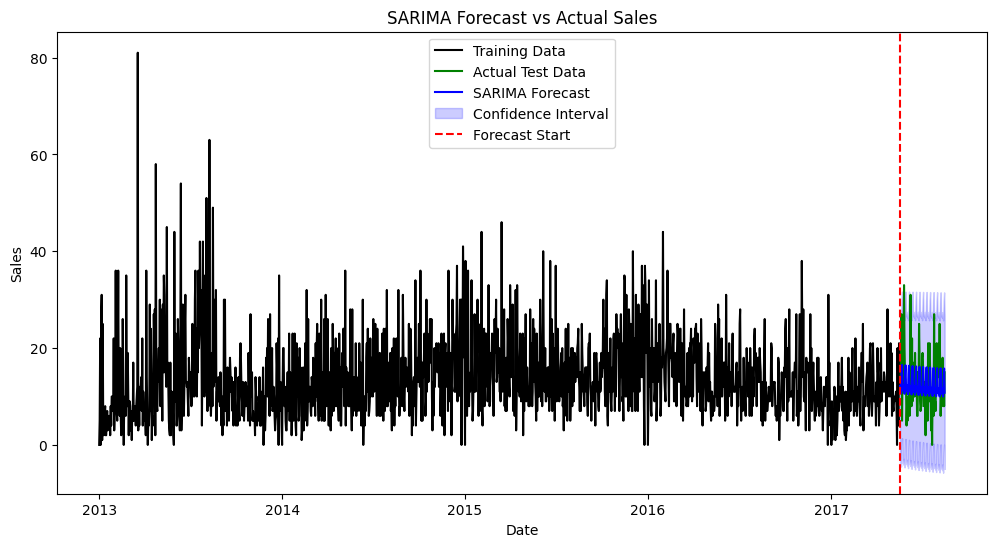

In [131]:
#Forecasting the next 90 days
sarima_forecast = sarima_results.get_forecast(steps=90)
sarima_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()
# Align forecast with test data dates
sarima_forecast_index = test_data['ds']
sarima_mean.index = sarima_forecast_index
sarima_conf_int.index = sarima_forecast_index

plt.figure(figsize=(12,6))

# Training data
plt.plot(train_data['ds'], train_data['y'], label='Training Data', color='black')

# Test data
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='green')

# SARIMA forecast
plt.plot(sarima_mean.index, sarima_mean, label='SARIMA Forecast', color='blue')

# Confidence interval
plt.fill_between(sarima_conf_int.index,
                 sarima_conf_int.iloc[:, 0],
                 sarima_conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label='Confidence Interval')

# Forecast start line
plt.axvline(x=train_data['ds'].max(), color='red', linestyle='--', label='Forecast Start')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Forecast vs Actual Sales')
plt.legend()
plt.show()


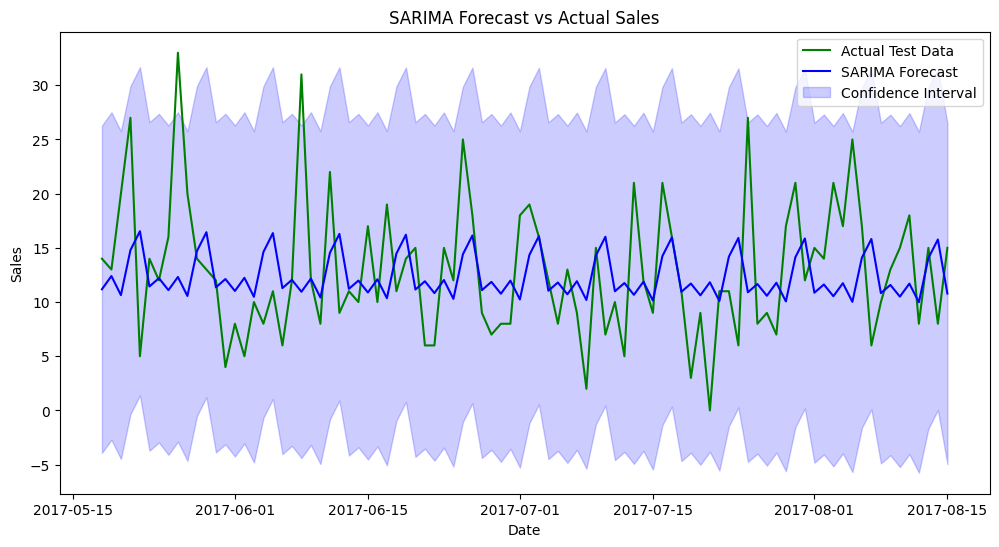

In [132]:
plt.figure(figsize=(12,6))

# Test data
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Data', color='green')

# SARIMA forecast
plt.plot(sarima_mean.index, sarima_mean, label='SARIMA Forecast', color='blue')

# Confidence interval
plt.fill_between(sarima_conf_int.index,
                 sarima_conf_int.iloc[:, 0],
                 sarima_conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Forecast vs Actual Sales')
plt.legend()
plt.show()


In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_sarima = mean_absolute_error(test_data['y'], sarima_mean)
rmse_sarima = np.sqrt(mean_squared_error(test_data['y'], sarima_mean))


## Comparing the MAE and RMSE of the Prophet and SARIMA models

In [143]:
print(f"SARIMA MAE: {mae_sarima:.4f}", f"SARIMA RMSE: {rmse_sarima:.4f}" )
print(f'Prophet MAE: {mae:.4f}', f'Prophet RMSE: {rmse:.4f}')

SARIMA MAE: 4.9692 SARIMA RMSE: 6.5856
Prophet MAE: 4.9659 Prophet RMSE: 6.6688
